<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/TF_pjt_1_Convers%C3%A3o_Celsius_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Libs**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importando os dados**

In [3]:
temperature_df = pd.read_csv('/content/sample_data/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True) # retirando a coluna de índice da tabela

In [5]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [6]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [8]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


**Visualização da base de Dados**

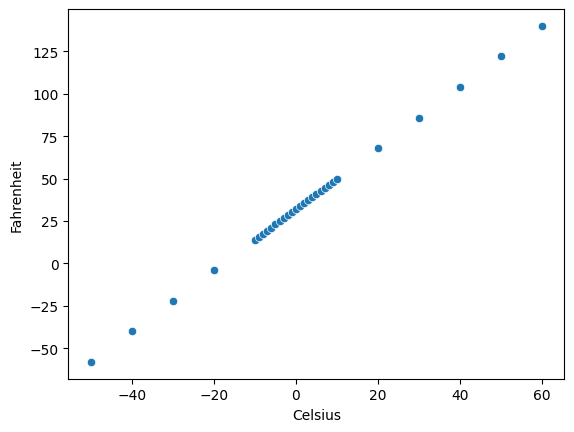

In [16]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']); # o ";" tira as informações do gráfico montado

**Configuração da base de dados de treino**

In [17]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

**Construção e treinamento do modelo**

In [18]:
model = tf.keras.Sequential() # construção de uma sequência de de camadas
''' Dense -> todos os nós da camada estão conectados com todos os nós da camada seguinte;
    units -> número de saídas(output) da rede neural;
    input_shape -> número de entradas(input) da rede neural;
'''
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Os 2 parâmetros(Param) indicam os dois pesos da adicionados no nó referentes à proporção do ºF em relação a entrada em Celsius e a constante da equação de conversão de uma escala para a outra.

<br/>
<img src="/content/sample_data/neuronoi_perceptron.png" title="Rede Neural"/>


**Compilar o modelo usando um algoritmo**

In [19]:
'''
  O algoritmo usado será o de descida de gradiente -> Adam. Com o parâmetro de 0.5, que indica o quão rápido o algoritmo irá aprender.
  Será implementado a função de erro(loss) para avaliar a diferença(erro) entre o valor real(ideal) da fórmula e o previsto pela rede(modelo) treinada.
  Como avaliação do erro será usado o "Erro Médio Quadrático".
'''
model.compile(optimizer = tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

**Estabelecer o loop de treinamento do modelo**

In [20]:
# Será um loop de 100 repetições de aprendizado da rede neural para estabelecer os melhores pesos (w1 e Bias)
epochs_hist = model.fit(X_train, y_train, epochs = 100) # histórico de treinamento

Epoch 1/100
1/1 [==============================] - 1s 566ms/step - loss: 4410.7500
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 3191.2803
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 2236.2424
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1544.0026
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1102.9019
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 886.6627
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 850.9140
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 934.4261
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 1068.3142
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1191.2015
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 1262.2434
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 1265.2242
Epoch 13/100
1/1 [====

Após 100 épocas(repetições) o erro médio quadrático calculado é de 1,789. É possível diminuir esse erro aumentando a taxa de velocidade de aprendizado, ou seja, diminuindo o parâmetro do 'Adam' e aumento o número de repetições do loop de aprendizado do rede neural

**Recompilar o modelo alterando do parâmetro do 'Adam'**

In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

**Aumentando o número de repetições do loop de treinamento**

In [22]:
# Será um loop de 500 repetições de aprendizado da rede neural para estabelecer os melhores pesos (w1 e Bias)
epochs_hist = model.fit(X_train, y_train, epochs = 500) # histórico de treinamento

Epoch 1/500
1/1 [==============================] - 1s 588ms/step - loss: 1.6159
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 5.4195
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1.3699
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.8608
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 3.0727
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 2.1314
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 0.7431
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 0.4056
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0032
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1.3614
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9651
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 0.3045
Epoch 13/500
1/1 [==============================] - 0

**Avaliação do modelo**

Visualizando a diminuíção do erro de previsão do moddelo

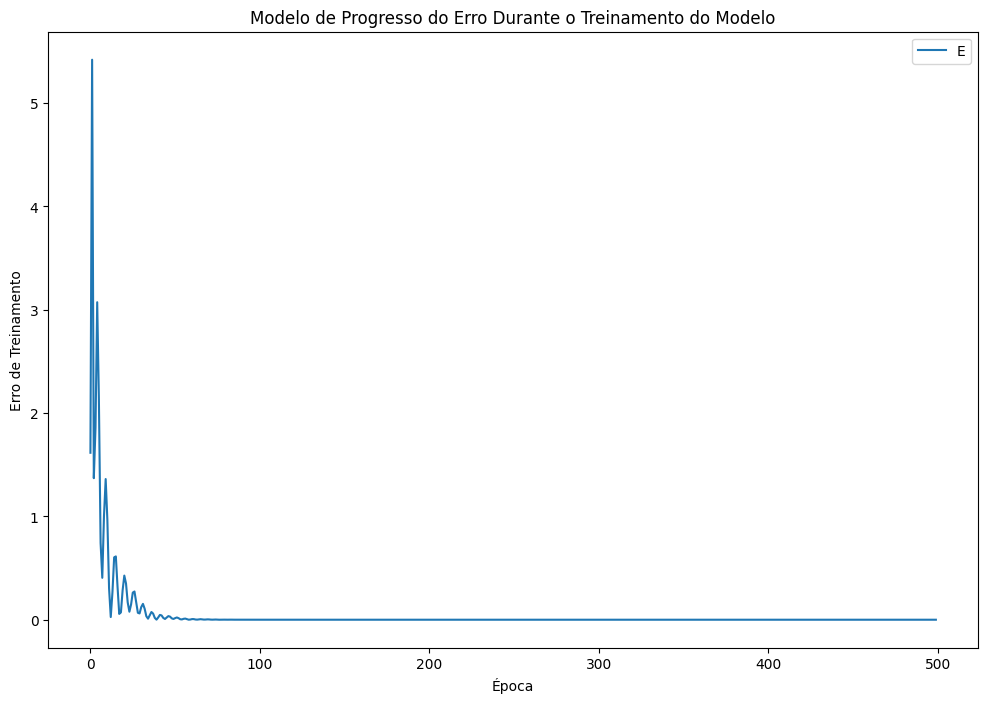

In [29]:
fig=plt.figure(figsize=(12,8))
plt.plot(epochs_hist.history['loss'])
plt.title('Modelo de Progresso do Erro Durante o Treinamento do Modelo')
plt.xlabel('Época')
plt.ylabel('Erro de Treinamento')
plt.legend('Erro');

**Visualizando os pesos estabelecidos pela rede treinada**

In [30]:
'''
  Os pesos estabelecidos pela rede treinada:
  w1 = 1.8
  Bias = 32
'''
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

Os pesos estabelecidos pela rede neural são os mesmos dos previstos pela fórmula de conversão da temperatura em Celsius para Fahrenheit (9/5=1.8 e 32)

**Usando o modelo treinado para fazer previsão**

In [36]:
# temperatura em ºC p/ fazer a conversão
temp_c = 0

# temperatura em ºF que vai ser prevista
temp_f = model.predict([temp_c])

# temperatura prevista em ºF
temp_f

1/1 [==============================] - 0s 56ms/step


array([[32.]], dtype=float32)

Comparando com a fórmula física

In [38]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

32.0